In [28]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import sklearn ;
print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.3.2


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

In [6]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

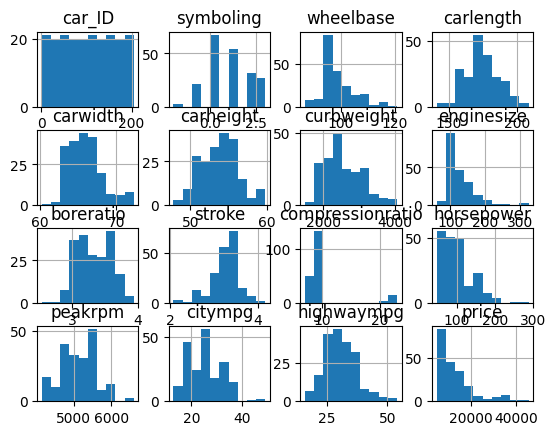

In [5]:
data.hist()

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
sum(data.duplicated(subset='car_ID')) == 0

True

In [8]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
data['brand']=data.CarName.str.split(' ').str.get(0).str.lower()

In [10]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
data['brand']=data['brand'].replace(['vw','vokswagen'],'vokswagen')
data['brand']=data['brand'].replace(['maxda'],'mazda')
data['brand']=data['brand'].replace(['porcshce'], 'porsche')
data['brand']=data['brand'].replace(['toyouta'], 'toyota')

In [12]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volkswagen', 'volvo'],
      dtype=object)

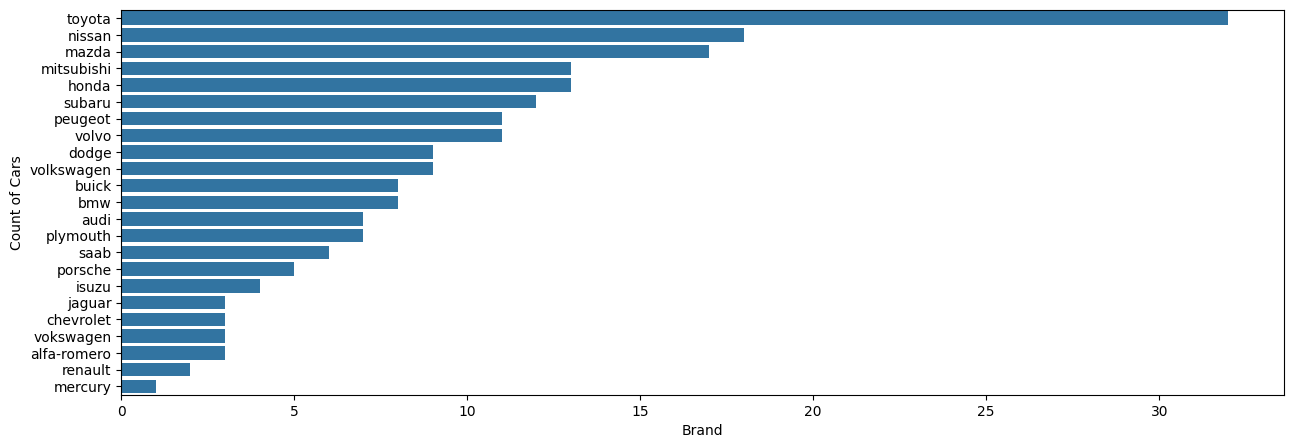

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax=plt.subplots(figsize=(15,5))
plt1=sns.countplot(data['brand'],order=pd.value_counts(data['brand']).index)
plt1.set(xlabel='Brand',ylabel='Count of Cars')
plt.show()
plt.tight_layout()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [14]:
data.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)

In [16]:
data.to_csv('cleaned_car_data.csv', index=False)

In [17]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [18]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [19]:
data.enginelocation.value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [20]:
data_comp_avg_price = data[['brand','price']].groupby('brand',as_index=False).mean().rename(columns={'price':'brand_avg_price'})

In [21]:
data=data.merge(data_comp_avg_price,on='brand')

In [22]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.297769
min       6007.000000
25%       9239.769231
50%      10175.555556
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [23]:
data['brand_category']=data['brand_avg_price'].apply(lambda x :"budget" if x< 10000
                                                     else("Mid_Range" if 10000<=x<20000
                                                          else  "Luxury"))

In [24]:
data.brand_category.unique()

array(['Mid_Range', 'Luxury', 'budget'], dtype=object)

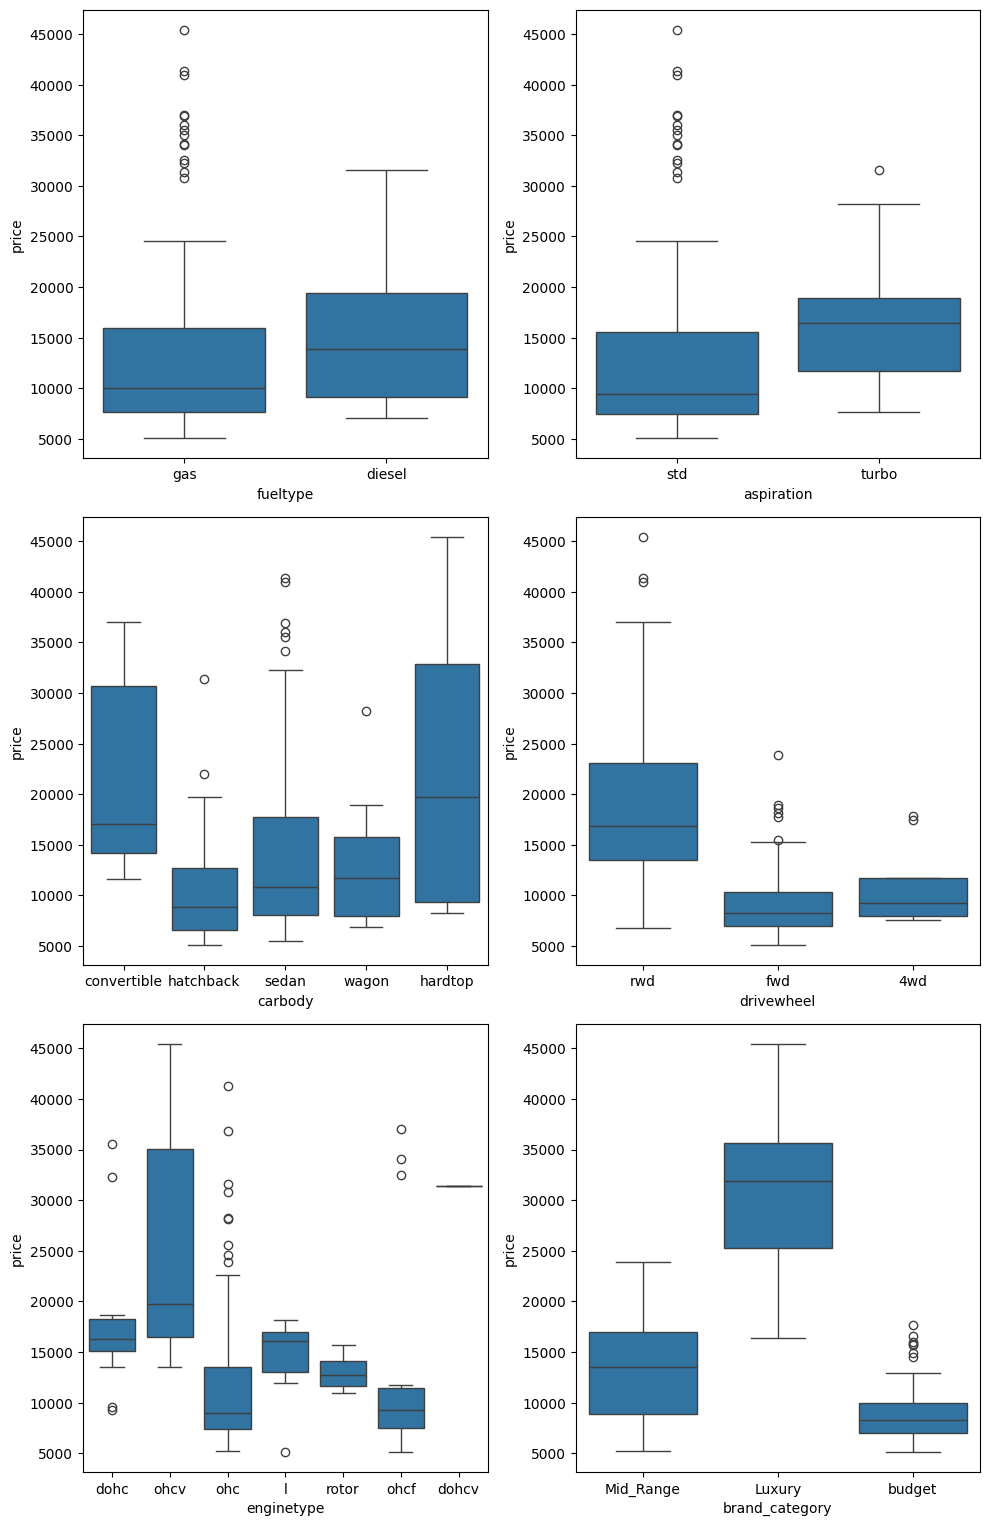

In [25]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

In [35]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [38]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

ValueError: could not convert string to float: 'gas'

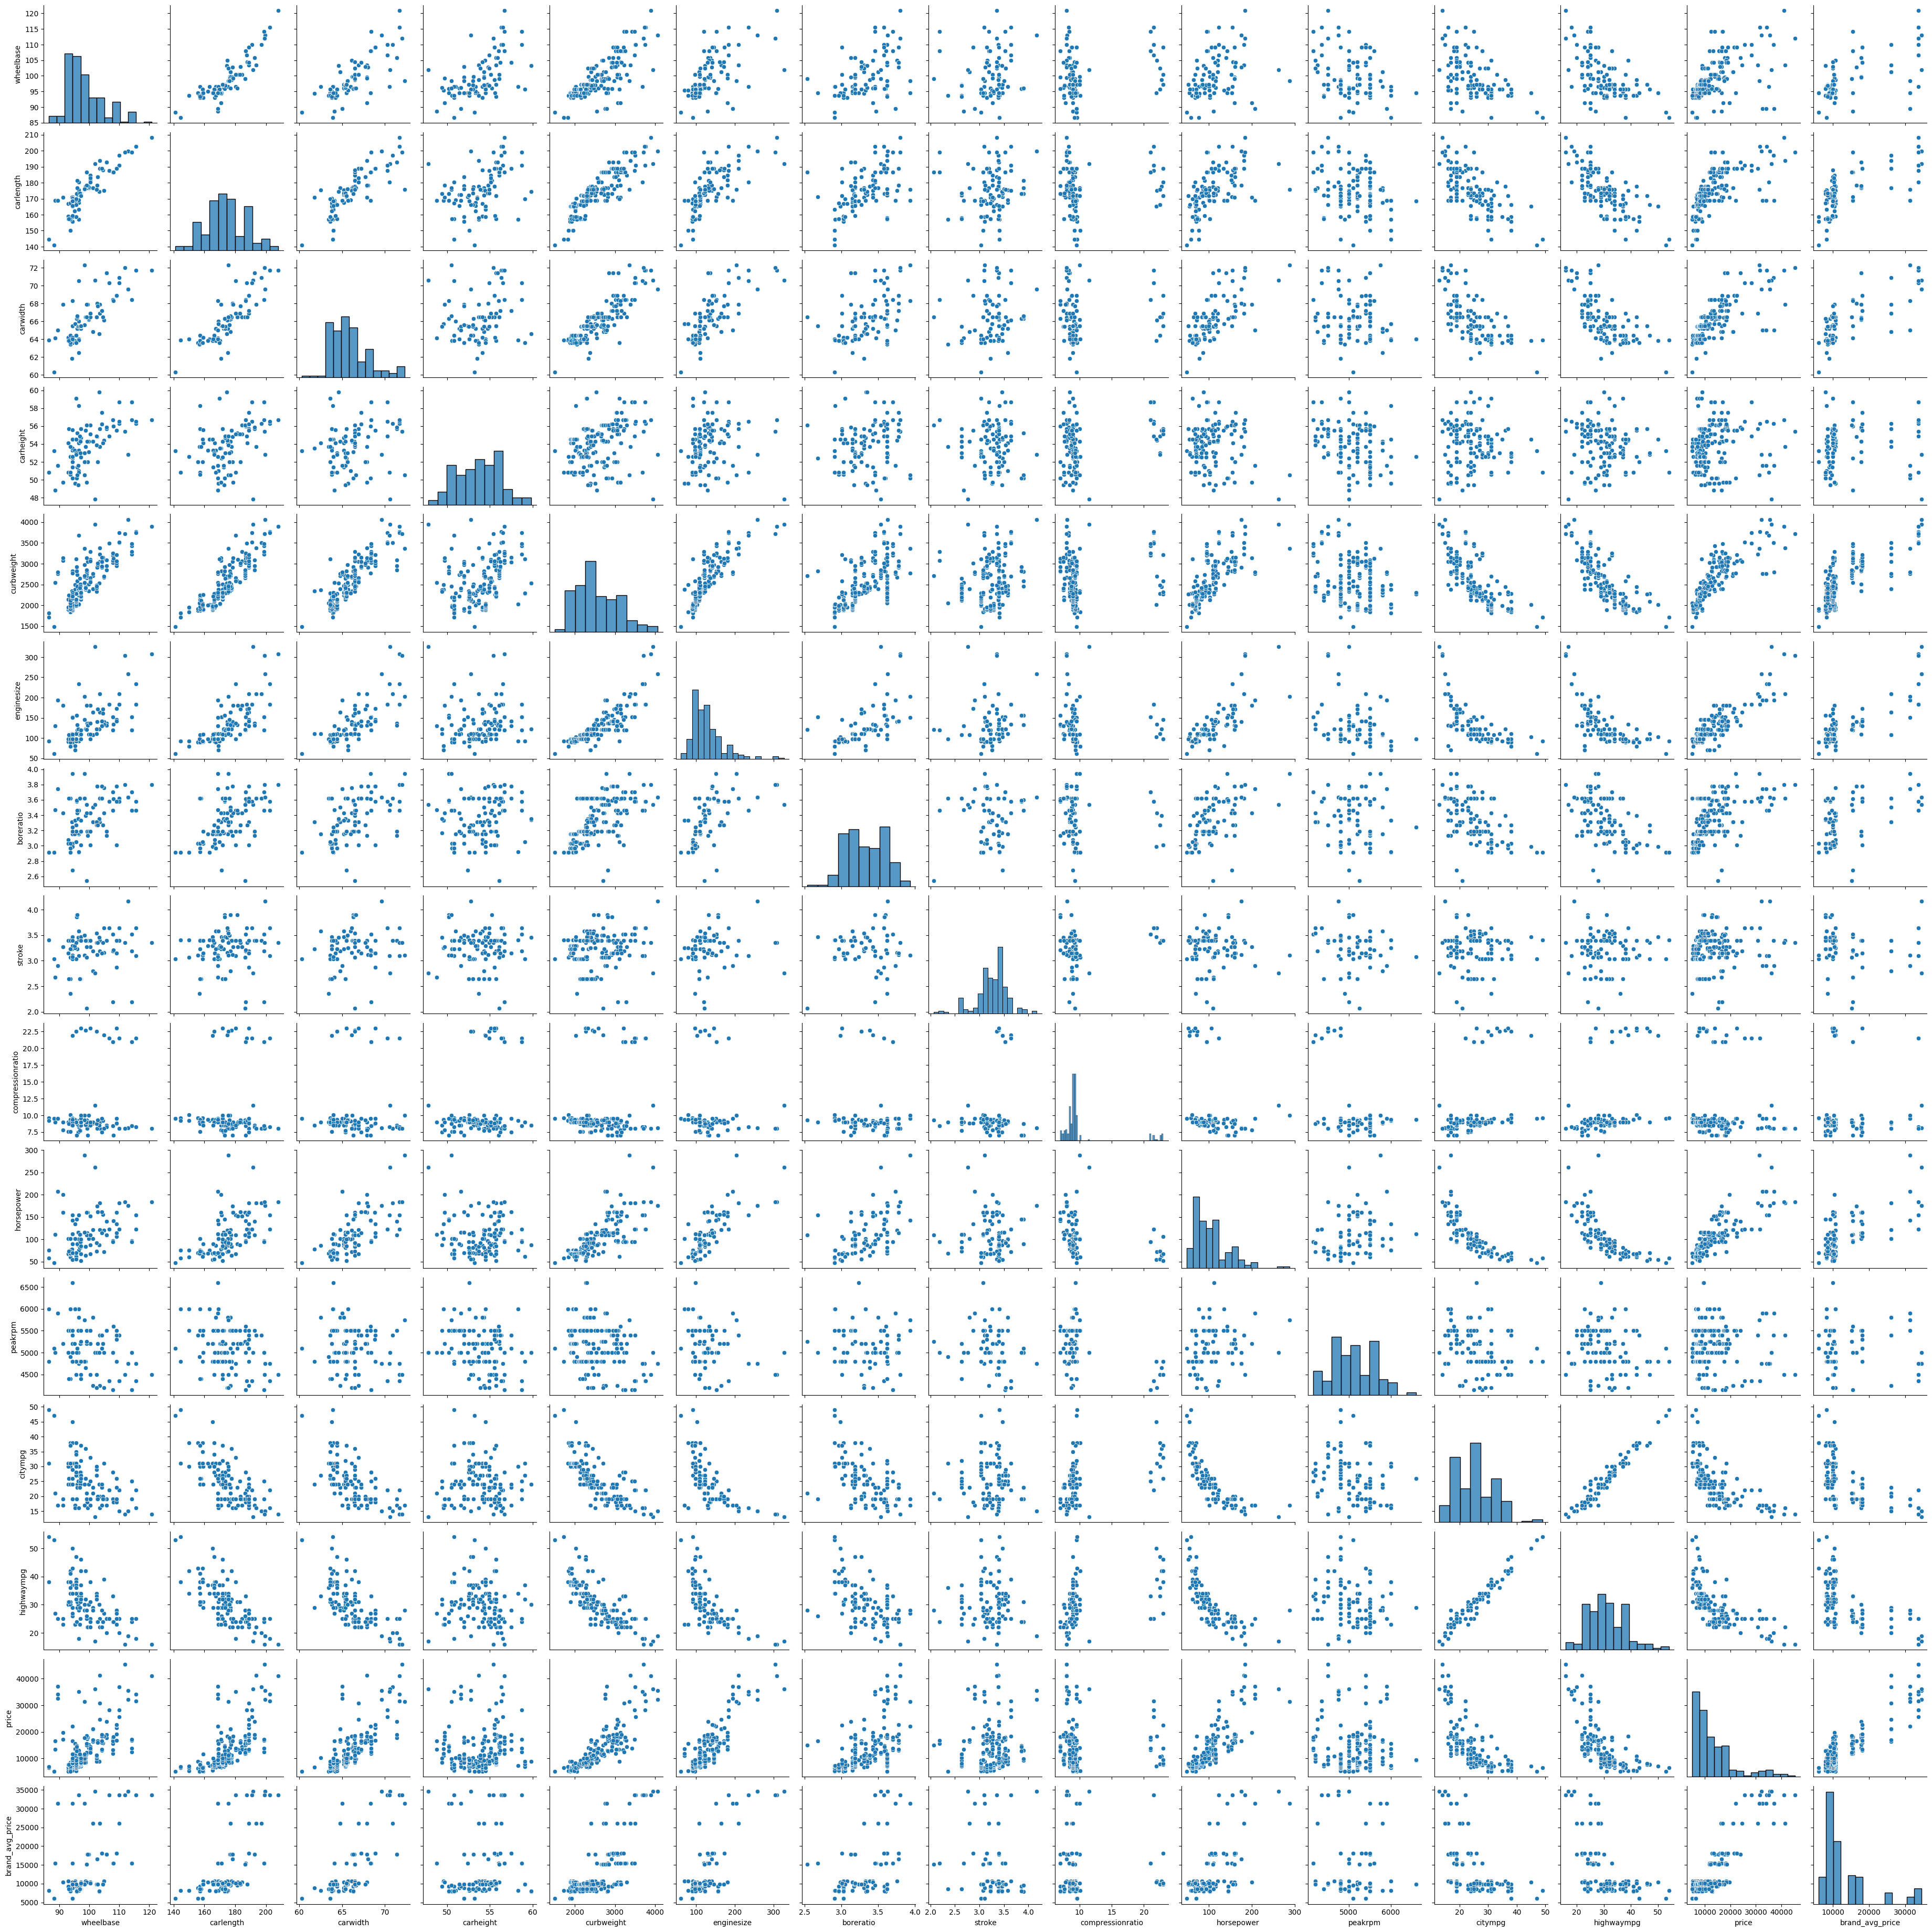

In [39]:
sns.pairplot(data)
plt.show()

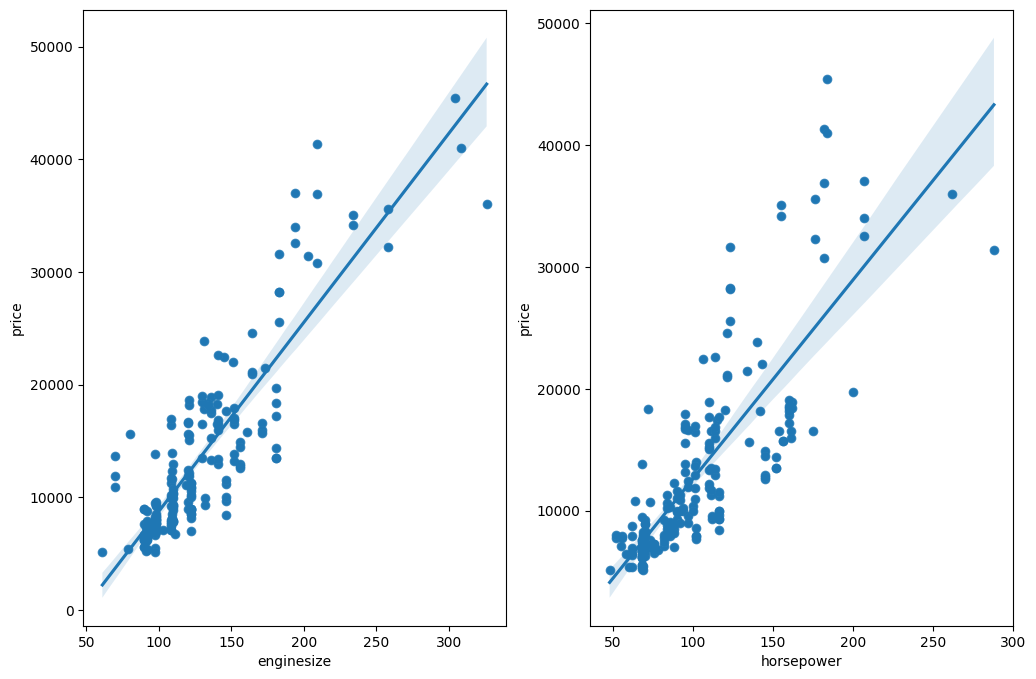

In [42]:
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),ncols=2,sharey=False)
sns.scatterplot(x=data.enginesize,y=data.price,ax=ax1)
sns.regplot(x=data.enginesize,y=data.price,ax=ax1)
sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2);

In [43]:
data.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

<Axes: xlabel='curbweight', ylabel='price'>

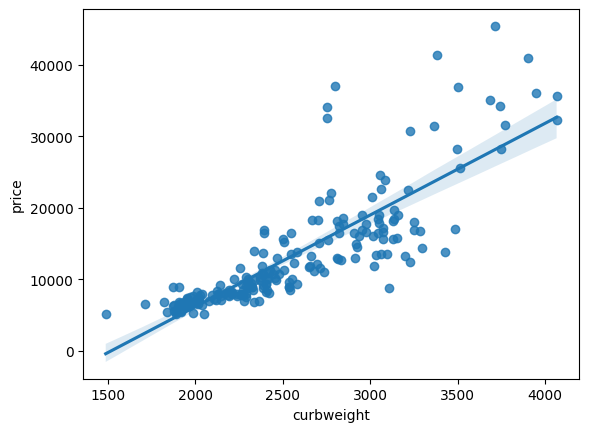

In [55]:
sns.regplot(x=data.curbweight,y=data.price,data=data)

<Axes: xlabel='enginesize', ylabel='price'>

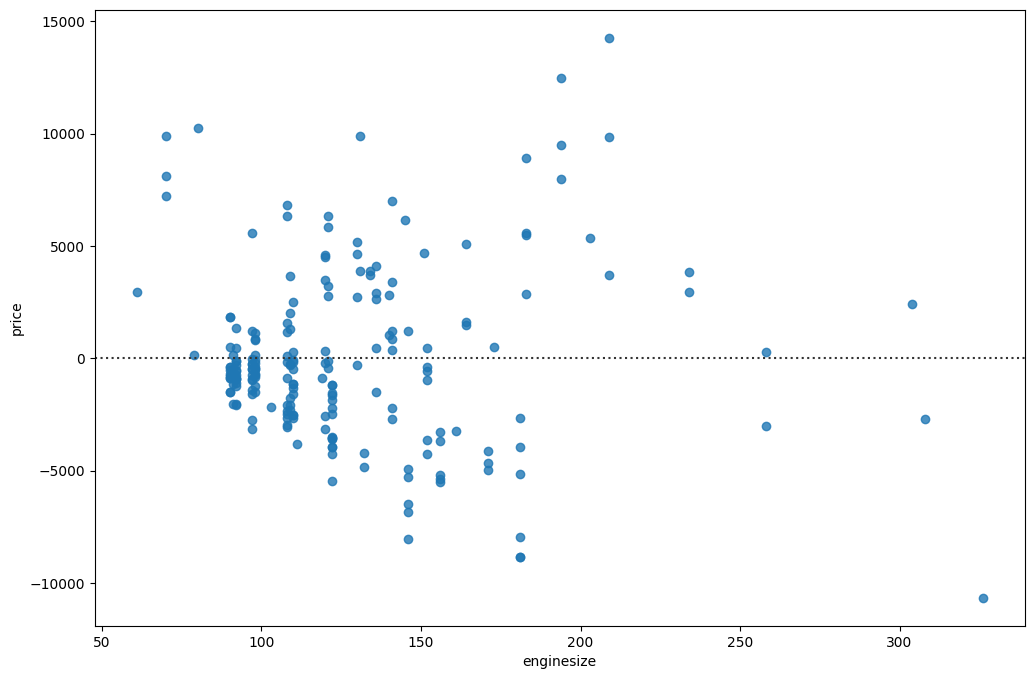

In [57]:
plt.subplots(figsize = (12,8))
sns.residplot(x=data.enginesize,y=data.price)

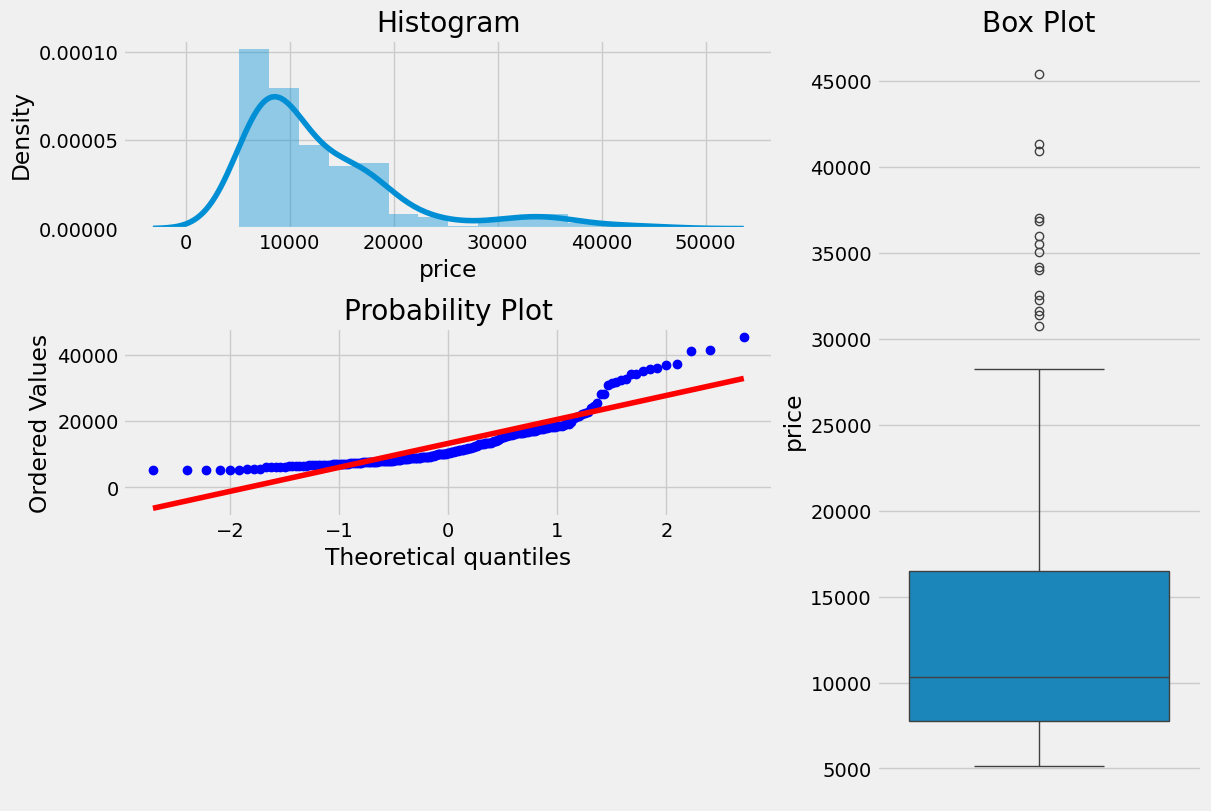

In [58]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(data, 'price')

In [59]:
previous_data=data.copy()

In [61]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

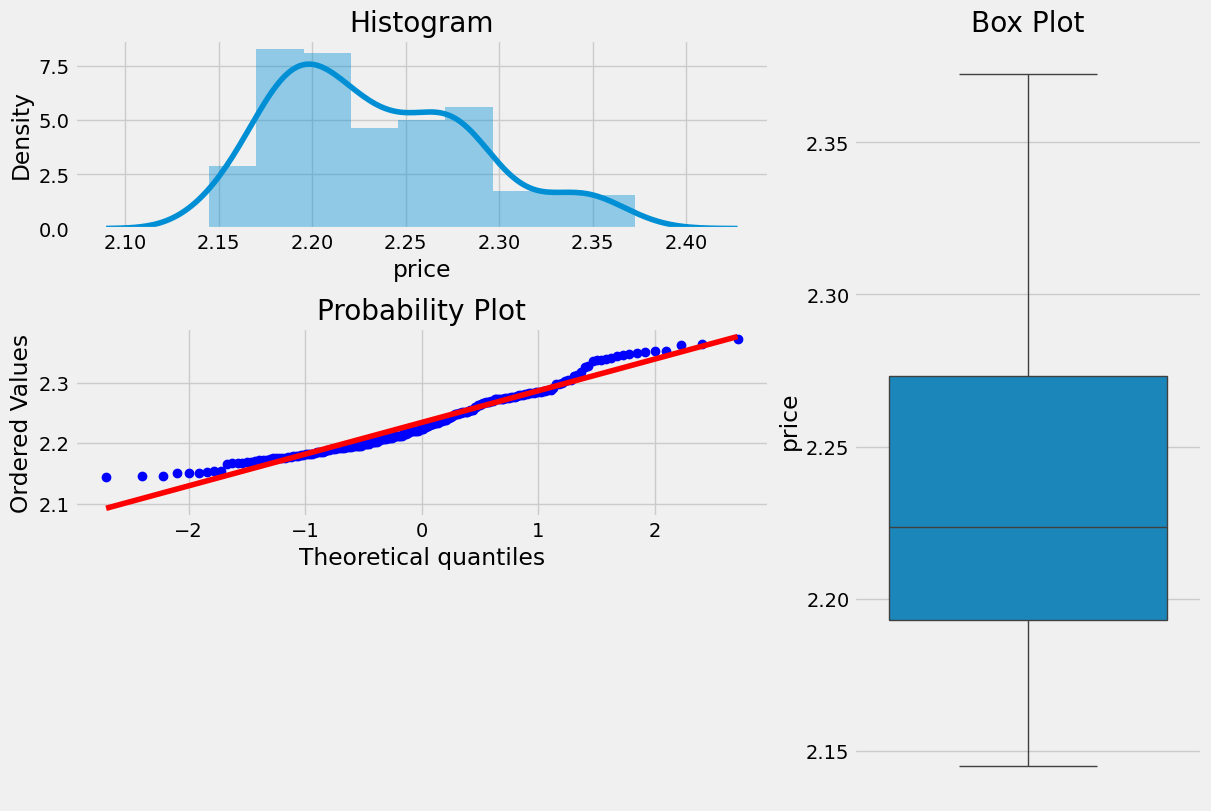

In [63]:
data['price']=np.log(data['price'])
plotting_3_chart(data,'price')

In [64]:
normaltest(data.price.values)

NormaltestResult(statistic=11.880463944474329, pvalue=0.0026314191640175247)

In [65]:
cp_result=boxcox(previous_data.price)
boxcox_price=cp_result[0]

In [66]:
normaltest(boxcox_price)

NormaltestResult(statistic=16.727142005584934, pvalue=0.000233210051298791)

In [1]:
num=data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(30,25))
sns.heatmap(num.corr(),annot=True,cmap="YlGnBu")
plt.show()                                                    

NameError: name 'data' is not defined

In [68]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [74]:
categorical_columns=[key for key, value in selected.dtypes.items()  if value=='O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [75]:
numeric_columns=list(set(columns)-set(categorical_columns))


In [76]:
numeric_columns

['citympg',
 'curbweight',
 'wheelbase',
 'enginesize',
 'price',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'highwaympg']

In [77]:
X = selected.drop("price", axis=1)
X.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [78]:
y = selected["price"].copy()
y.head()

0    2.252352
1    2.273271
2    2.273271
3    2.255833
4    2.279019
Name: price, dtype: float64

In [79]:
for column in  categorical_columns:
    print("column name:", column)
    print("value_count:")
    print( X[column].value_counts())

column name: fueltype
value_count:
fueltype
gas       185
diesel     20
Name: count, dtype: int64
column name: aspiration
value_count:
aspiration
std      168
turbo     37
Name: count, dtype: int64
column name: carbody
value_count:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
column name: drivewheel
value_count:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
column name: brand_category
value_count:
brand_category
budget       98
Mid_Range    83
Luxury       24
Name: count, dtype: int64
column name: enginetype
value_count:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
column name: cylindernumber
value_count:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
X=one_hot.fit_transform(X)
type(X)

numpy.ndarray

In [82]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range',
       'one_hot__brand_category_budget', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       

In [83]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Luxury',
 'category_Mid_Range',
 'category_budget',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [84]:
df=pd.DataFrame(data=X,columns=colunm_names)
df.to_csv('cleaned_car_data.csv', index=False)

In [86]:
def dummies(x,data):
    temp=pd.get_dummies(data[x],drop_first=True)
    data=pd.concat([data,temp],axis=1)
    data.drop([x],axis=1,inplace=True)
    return data
X_=selected[categorical_columns+numeric_columns]
N_column=0
for column in categorical_columns:
    print(pd.unique(data[column]))
    X_=dummies(column,X_)

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['Mid_Range' 'Luxury' 'budget']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [87]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.30,random_state=0)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
ss=StandardScaler()
ss

StandardScaler()

In [96]:
X_train=ss.fit_transform(X_train)

In [97]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [99]:
X_test=ss.transform(X_test)
car_price_predictions=lm.predict(X_test)
car_price_predictions

array([1.89204291, 1.89512004, 1.87316946, 1.8023295 , 1.90319741,
       1.90795883, 1.86853175, 1.81932001, 1.89494458, 1.86922104,
       2.04255055, 2.30195284, 1.81489904, 2.01331223, 1.87442181,
       1.89758949, 1.8611907 , 1.8526063 , 1.87549097, 1.87130992,
       1.86557663, 1.85529144, 1.8825119 , 1.89760058, 1.91724554,
       1.90291344, 1.88009458, 1.82953623, 1.87469769, 1.89899162,
       2.05490343, 1.87862922, 2.00603206, 1.88510749, 1.89899496,
       2.05208169, 1.97755162, 1.87159299, 1.87011788, 2.25487839,
       1.87441943, 1.84178325, 2.2454958 , 1.89142576, 1.87018223,
       1.87570094, 1.87581804, 1.87298389, 1.84243501, 1.99022581,
       1.86698184, 1.98475194, 1.89309556, 1.90151567, 1.91392899,
       1.89639845, 1.99643586, 1.91720023, 1.91304251, 1.87012408,
       1.86287635, 1.91128236])

In [100]:
mse=mean_squared_error(y_test,car_price_predictions)
mse

0.10712590704572947

In [101]:
lm.score(X_test,y_test)

-36.353048956558496

In [102]:
from sklearn.metrics import r2_score 

In [103]:
r2_score(y_test,car_price_predictions)

-36.353048956558496

In [104]:
steps=[('scaler',StandardScaler()),('lm',LinearRegression())]

In [105]:
pipe=Pipeline(steps=steps)

In [106]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [107]:
car_price_predictions=pipe.predict(X_test)
mse=mean_squared_error(y_test,car_price_predictions)
rmse=np.sqrt(mse)
rmse
r2_score(car_price_predictions,y_test)

-4.448771313631587e+27

In [109]:
X=selected[categorical_columns+numeric_columns]
one_hot=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(),categorical_columns)],remainder="passthrough")
steps=[('one_hot',one_hot),('scaler',StandardScaler()),('Im',LinearRegression())]

pipe=Pipeline(steps=steps)
pipe.fit(X,y)
car_price_predictions=pipe.predict(X)
r2_score(car_price_predictions,y)

1.0